# Understanding the effect of ADVERTISMENT MEDIUM (TV, RADIO, NEWSPAPER) IN SALES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

importing data

In [2]:
df = pd.read_csv('../EDA/data/advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.isnull().sum() # no null values detected

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


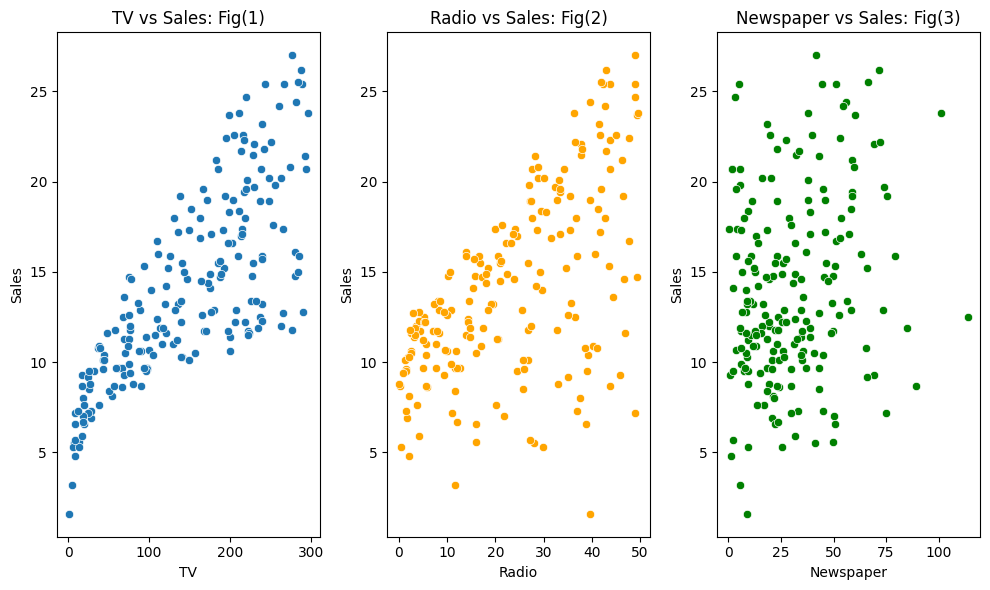

In [8]:
# scatterplot to visualize the relationship between each advertising medium and sales

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df, ax=ax1)
ax1.set_title('TV vs Sales: Fig(1)')

ax2 = fig.add_subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df, ax=ax2, color='orange')
ax2.set_title('Radio vs Sales: Fig(2)')

ax3 = fig.add_subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df, ax=ax3, color='green')
ax3.set_title('Newspaper vs Sales: Fig(3)')
plt.tight_layout()
plt.show()


The scatterplots illustrate the relationship between different advertising media (TV, Radio, and Newspaper) and Sales.

From Figure (i), which represents TV vs Sales, the data points show a clear upward trend. As TV advertising expenditure increases, Sales also increase. The points are relatively close to an imaginary straight line, indicating a strong positive correlation between TV advertising and Sales.

In Figure (ii), showing Radio vs Sales, the scatterplot also demonstrates an upward trend. This indicates a positive correlation between Radio advertising and Sales. However, compared to the TV plot, the points are more dispersed and less tightly clustered around a line. Therefore, the strength of the relationship is moderate, not as strong as that of TV.

In Figure (iii), representing Newspaper vs Sales, the scatterplot shows a slight upward tendency. However, the data points are widely scattered without forming a clear linear pattern. This suggests a weak positive correlation between Newspaper advertising and Sales.

In conclusion, among the three advertising media, TV shows the strongest positive relationship with Sales, Radio shows a moderate positive relationship, and Newspaper shows a weak positive relationship.

In [9]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


the correlation matrix validates the visual interpretation of the scatterplots: TV has the strongest positive correlation with Sales, Radio has a moderate positive correlation, and Newspaper has a relatively weaker positive correlation.

In [10]:
from scipy.stats import linregress


Feature: TV
  Slope: 0.0475366404330197
  Intercept: 7.032593549127702
  R-squared: 0.6118750508500707
  p_value: 1.4673897001948012e-42
  Standard Error: 0.0026906071877968703



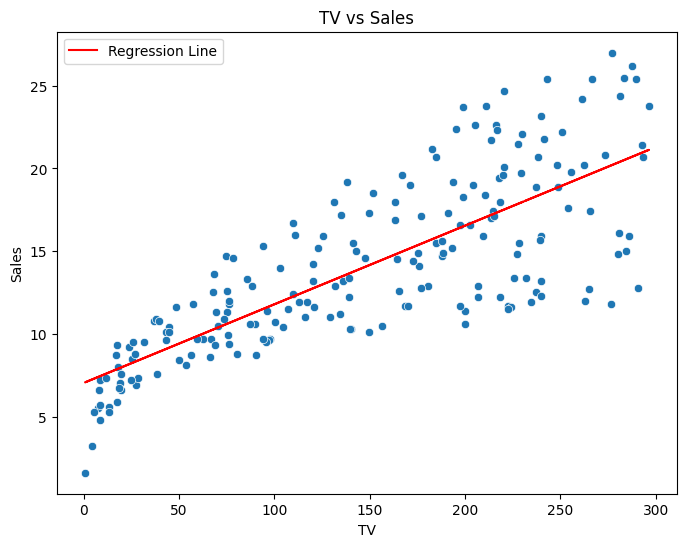

Feature: Radio
  Slope: 0.20249578339243954
  Intercept: 9.311638095158287
  R-squared: 0.332032455445295
  p_value: 4.354966001766976e-19
  Standard Error: 0.02041130636009063



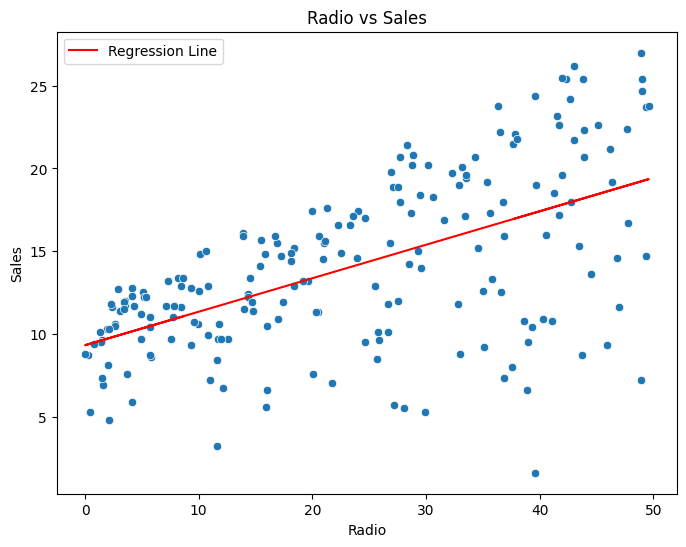

Feature: Newspaper
  Slope: 0.05469309847227331
  Intercept: 12.351407069278162
  R-squared: 0.05212044544430501
  p_value: 0.0011481958688882112
  Standard Error: 0.016575721876358154



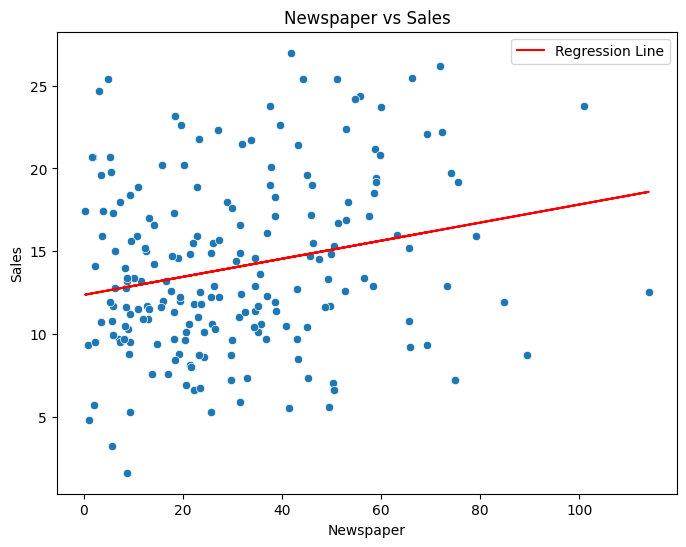

In [11]:
X = df.drop('Sales', axis=1)
y = df['Sales']

for col in X.columns:
    slope, intercept, r_value, p_value, std_error = linregress(X[col], y)
    print(f"Feature: {col}")
    print(f"  Slope: {slope}")
    print(f"  Intercept: {intercept}")
    print(f"  R-squared: {r_value**2}")
    print(f"  p_value: {p_value}")
    print(f"  Standard Error: {std_error}\n")

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[col], y=y)
    plt.plot(X[col], intercept + slope * X[col], color='red', label='Regression Line')
    plt.title(f'{col} vs Sales')
    plt.xlabel(col)
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

Every $1000 increased in TV Ads, would result in (0.0475366404330197 * 1000) = $47.53 in sales. TV Ads alone explains the 61% variation in sales. The effect of TV is statistically significant (p_value < 0.05)

Every $1000 increased in Radio Ads, would result in (0.20249578339243954 * 1000) = $20.24 in sales. TV Ads alone explains the 31% variation in sales. The effect of TV is statistically significant (p_value > 0.05)

Spending more on Newspaper shows a small increase in sales per $1,000, but this increase could just be due to random chance. We cannot confidently say Newspaper spending drives sales.

In [12]:
import statsmodels.api as sm

# Independent variables (predictors)
X = df[['TV', 'Radio', 'Newspaper']]

# Dependent variable
y = df['Sales']

# Add constant term for intercept
X = sm.add_constant(X)

# Fit multiple linear regression model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 27 Feb 2026   Prob (F-statistic):           1.58e-96
Time:                        19:41:49   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [14]:
print(model.pvalues)

const        1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64


In [15]:
print("F-statistic:", model.fvalue)
print("F p-value:", model.f_pvalue)

F-statistic: 570.2707036590941
F p-value: 1.5752272560924904e-96


The overall regression model is highly statistically significant.
At least one predictor (in this case, TV or Radio) reliably explains variation in Sales.

Even though Newspaper alone is not significant, the model as a whole works very well because TV and Radio strongly explain Sales.

In [17]:
df['TV_RADIO'] = df['TV'] * df['Radio']
df['TV_squared'] = df['TV'] ** 2
df

,TV,Radio,Newspaper,Sales,TV_RADIO,TV_squared
0,230.1,37.8,69.2,22.1,8697.78,52946.01
1,44.5,39.3,45.1,10.4,1748.85,1980.25
2,17.2,45.9,69.3,9.3,789.48,295.84
3,151.5,41.3,58.5,18.5,6256.95,22952.25
4,180.8,10.8,58.4,12.9,1952.64,32688.64
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,141.34,1459.24
196,94.2,4.9,8.1,9.7,461.58,8873.64
197,177.0,9.3,6.4,12.8,1646.10,31329.00
198,283.6,42.0,66.2,25.5,11911.20,80428.96


In [19]:
X = df.drop('Sales', axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2764.
Date:                Fri, 27 Feb 2026   Prob (F-statistic):          3.55e-178
Time:                        19:52:56   Log-Likelihood:                -185.68
No. Observations:                 200   AIC:                             383.4
Df Residuals:                     194   BIC:                             403.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0792      0.196     25.943      0.0

Interaction and nonlinear effects capture more complexity → huge improvement in model fit

Newspaper still not significant → may not be worth spending

TV × Radio shows that combined advertising on TV and Radio boosts sales more than expected from their individual effects

Negative TV² coefficient → diminishing returns: very high TV spending gives smaller marginal increases in sales

Adding interaction and squared terms makes the model much more accurate (R² 98.6%). TV and Radio work together to increase sales, but extremely high TV spending eventually has smaller incremental benefits. Newspaper ads don’t meaningfully contribute, so the budget is better spent on TV and Radio.

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

      feature        VIF
0       const  19.834054
1          TV  18.799142
2       Radio   4.112485
3   Newspaper   1.149958
4    TV_RADIO   6.948845
5  TV_squared  15.930303


Model predicts very well, but the high VIFs for TV, TV², and TV × Radio mean that the exact coefficients for these terms are not perfectly reliable individually.
However, the overall effect of TV and Radio together is real and strong.

BUSINESS CONCLUSION: TV and Radio are your most effective advertising channels. Spending on Newspaper ads does not help. Combining TV and Radio maximizes sales, but extremely high TV spending gives smaller incremental returns. Overall, the model explains 98.6% of sales variability, so you can confidently use it to guide marketing budget allocation.